In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
plt.rcParams['figure.figsize'] = (15, 5)

c:\users\tea\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


# Tour de France v zadnjih 5 letih

In [19]:
r2012 = pd.read_csv('Tour-rumena-majica\\2012_0.csv')
r2013 = pd.read_csv('Tour-rumena-majica\\2013_0.csv')
r2014 = pd.read_csv('Tour-rumena-majica\\2014_0.csv')
r2015 = pd.read_csv('Tour-rumena-majica\\2015_0.csv')
r2016 = pd.read_csv('Tour-rumena-majica\\2016_0.csv')
st2 = pd.read_csv('Starosti\\St2012.csv')
st3 = pd.read_csv('Starosti\\St2013.csv')
st4 = pd.read_csv('Starosti\\St2014.csv')
st5 = pd.read_csv('Starosti\\St2015.csv')
st6 = pd.read_csv('Starosti\\St2016.csv')

In [20]:
rs2 = r2012.merge(st2, on='ime_tekmovalca')
rs3 = r2013.merge(st3, on='ime_tekmovalca')
rs4 = r2014.merge(st4, on='ime_tekmovalca')
rs5 = r2015.merge(st5, on='ime_tekmovalca')
rs6 = r2016.merge(st6, on='ime_tekmovalca')

OPOMBE:

a) Določene ekipe so se v preteklih 5 letih večkrat preimenovale
(npr. "Saxo Bank–Tinkoff Bank" ~> "Saxo-Tinkoff" ~> "Tinkoff-Saxo" ~> "Tinkoff")
in sočasno spremenile sestavo(ali pa tudi ne). Da bi se izognila 
zapletom (v kolikšni meri je "nova" ekipa lahko smatrana kot 
ekvivalentna "stari"), obravnavam vse ekipe z različnim imenom
kot samostojne (tj. v zgornjem primeru imamo 4 različne ekipe).

## 1) Končni nosilci rumene majice in zasledovalci 

*Nosilec rumene majice (oz. zmagovalec Toura) je zmagovalec v skupnem seštevku časov vseh etap.*

### Najuspešnejša država/ekipa skozi leta po končni razvrstitvi

V tem razdelku se seveda pojavi problem iz prve opombe. Nekatere ekipe so namreč
prisotne vsa leta, nekatere le eno... Enako je pravzaprav z državami, saj v nasprotju
s "kolesarskimi velesilami" udeležba ostalih ni tako samoumevna.
Poleg tega se pri Touru večkrat govori o ekipah kot o državah, iz katerih prihajajo 
tekmovalci.
Karkorkoli že, za najuspešnejšo štejem tisto ekipo, ki prednjači po vseh kriterijih,
torej tudi po tem, koliko let je sodelovala (pod istim imenom in ne glede na zasedbo).

In [22]:
vse = pd.concat([r2012, r2013, r2014, r2015, r2016])
naj50 = pd.concat([r2012[:50], r2013[:50], r2014[:50], r2015[:50], r2016[:50]])
naj10 = pd.concat([r2012[:10], r2013[:10], r2014[:10], r2015[:10], r2016[:10]])
drzave50 = naj50[['leto', 'mesto', 'ime_tekmovalca', 'država']]
ekipe50 = naj50[['leto', 'mesto', 'ime_tekmovalca', 'ekipa']]

drzave10 = drzave50[drzave50.mesto <= 10]
ekipe10 = ekipe50[ekipe50.mesto <= 10]

najdrzave = drzave10[drzave10.mesto == 1].set_index('leto')
najekipe = ekipe10[drzave10.mesto == 1].set_index('leto')

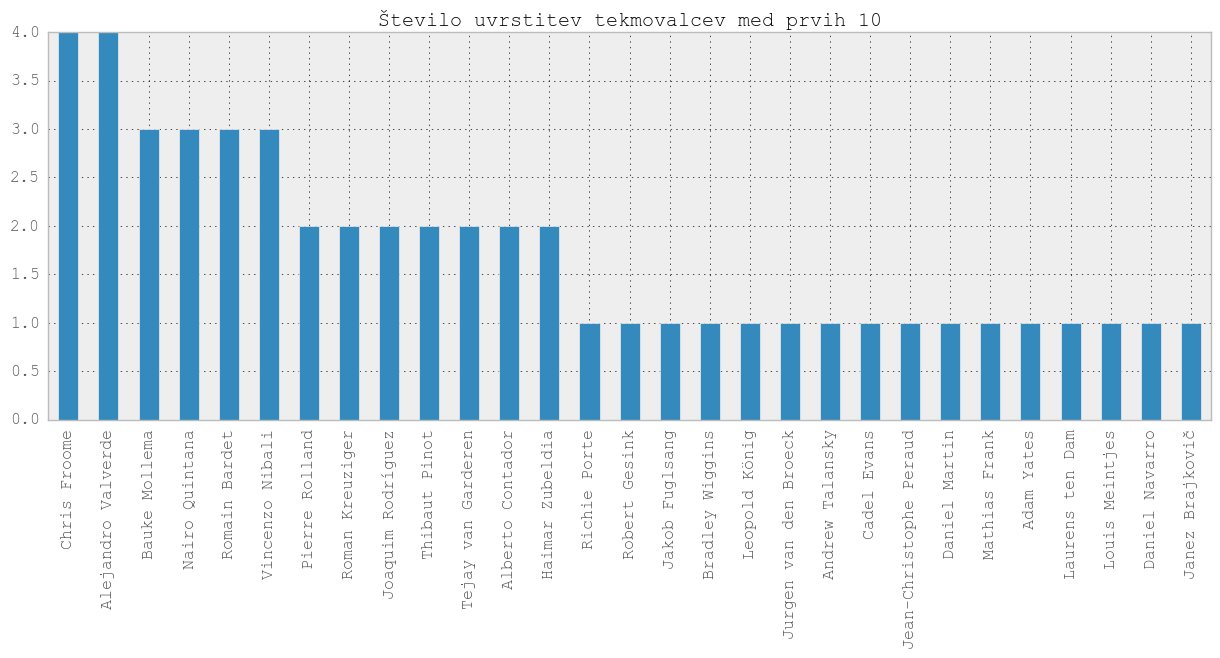

In [23]:
naj10['ime_tekmovalca'].value_counts().plot(kind='bar', fontsize='12',
                                            title='Število uvrstitev tekmovalcev med prvih 10')

In [24]:
najdrzave

,mesto,ime_tekmovalca,država
leto,,,
2012,1,Bradley Wiggins,Velika Britanija
2013,1,Chris Froome,Velika Britanija
2014,1,Vincenzo Nibali,Italija
2015,1,Chris Froome,Velika Britanija
2016,1,Chris Froome,Velika Britanija


In [25]:
najekipe

,mesto,ime_tekmovalca,ekipa
leto,,,
2012,1,Bradley Wiggins,Team Sky
2013,1,Chris Froome,Team Sky
2014,1,Vincenzo Nibali,Astana
2015,1,Chris Froome,Team Sky
2016,1,Chris Froome,Team Sky


### Zastopanost držav med prvimi 10/50/ oz. vsemi uvrščenimi 

,država
Španija,11
Francija,8
Velika Britanija,6
Nizozemska,5
ZDA,3


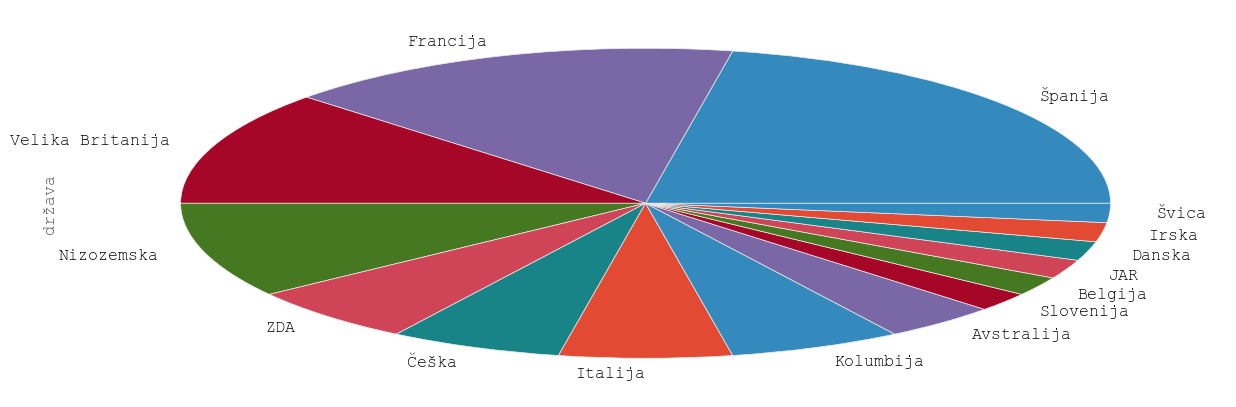

In [57]:
drzave10['država'].value_counts().plot(kind='pie', fontsize='12')
pd.DataFrame(drzave10['država'].value_counts())[:5]

,država
Francija,47
Španija,38
Nizozemska,20
Belgija,16
Italija,15


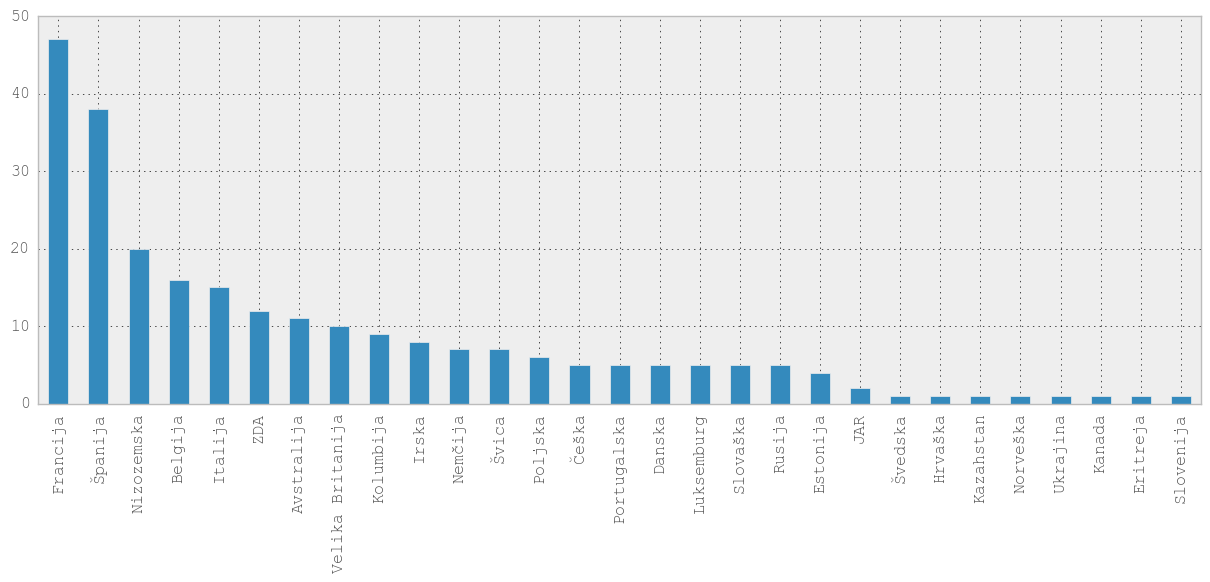

In [56]:
drzave50['država'].value_counts().plot(kind='bar', fontsize='12')
pd.DataFrame(drzave50['država'].value_counts())[:5]

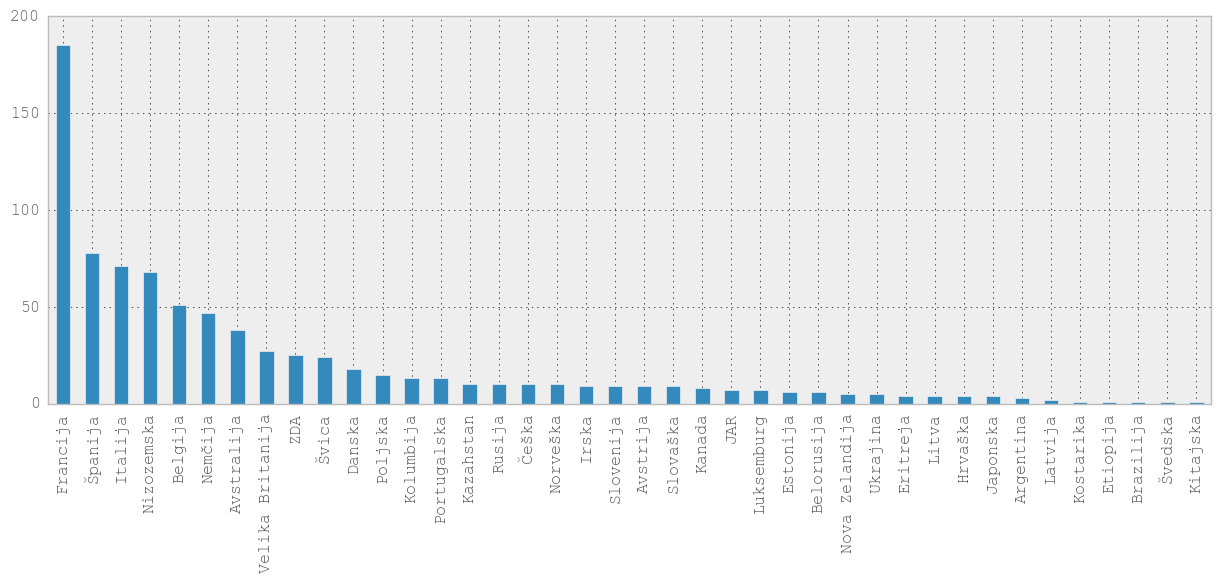

In [24]:
vse['država'].value_counts().plot(kind='bar', fontsize='12')

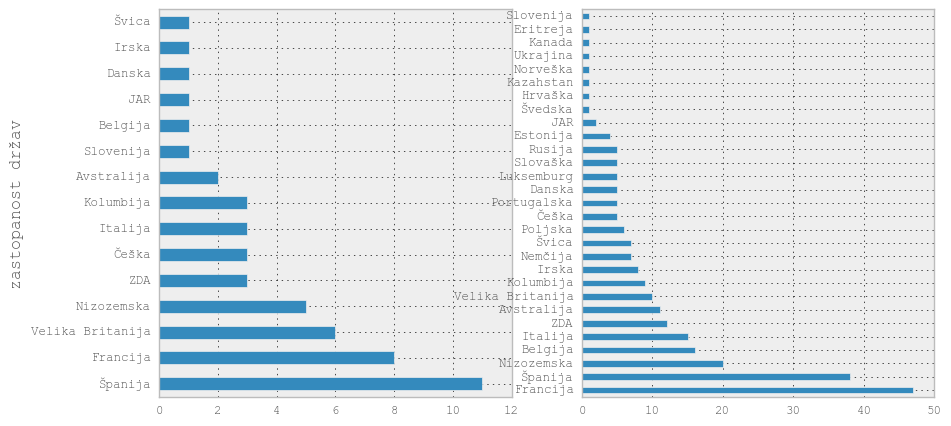

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for i,var in enumerate([drzave10['država'].value_counts(), 
                        drzave50['država'].value_counts()]):
    var.plot(ax=axes[i], kind='barh',fontsize=9)
axes[0].set_ylabel('zastopanost držav')


### Zastopanost ekip med prvimi 10/50 oz. vsemi uvrščenimi 

,ekipa
Movistar Team,7
Team Sky,5
Astana,4
BMC Racing Team,4
AG2R La Mondiale,4


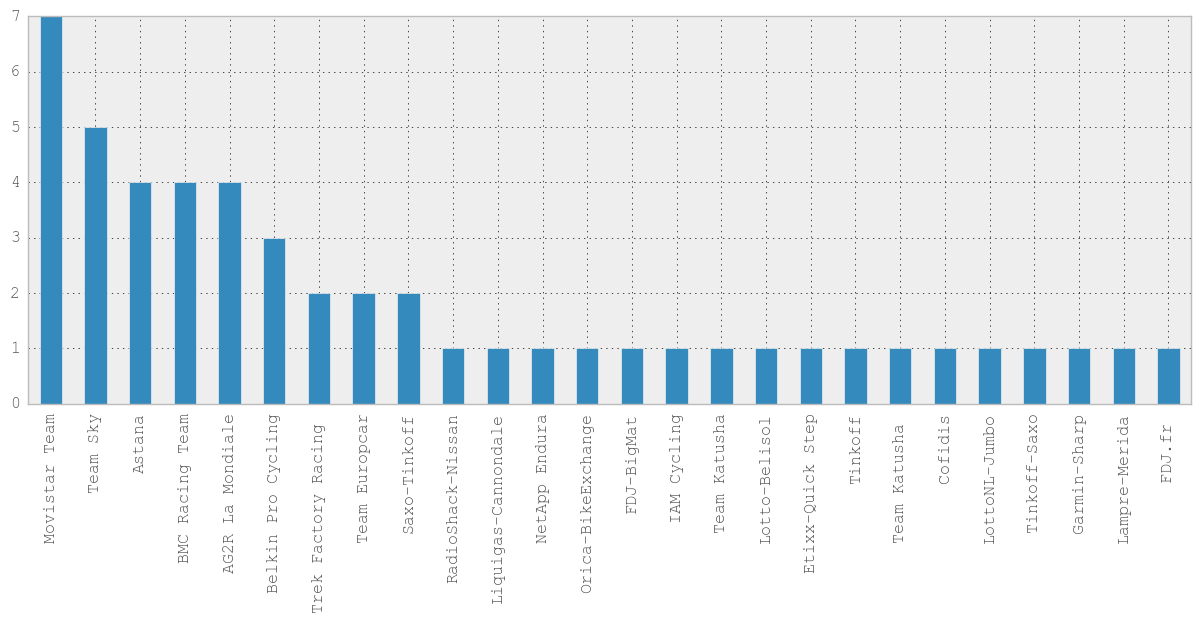

In [55]:
ekipe10['ekipa'].value_counts().plot(kind='bar', fontsize='12')
pd.DataFrame(ekipe10['ekipa'].value_counts())[:5]

,ekipa
BMC Racing Team,21
Team Sky,20
Movistar Team,19
Astana,18
AG2R La Mondiale,17


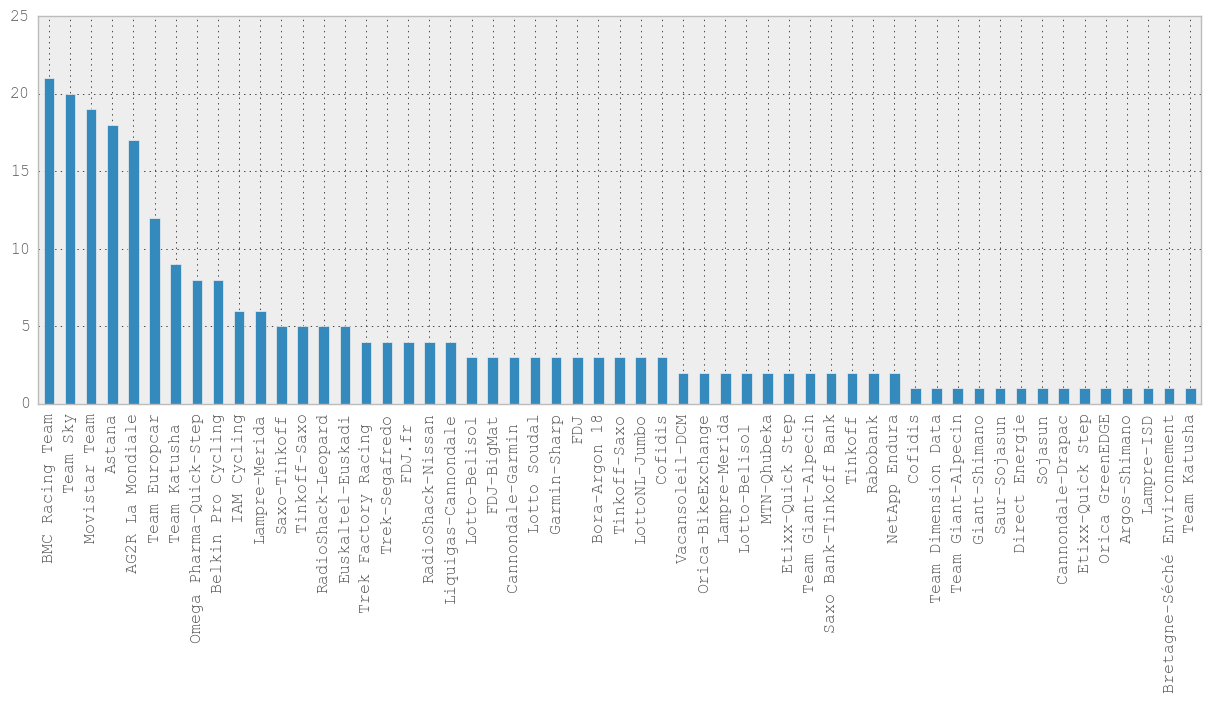

In [15]:
ekipe50['ekipa'].value_counts().plot(kind='bar', fontsize='12')
pd.DataFrame(ekipe50['ekipa'].value_counts())[:5]

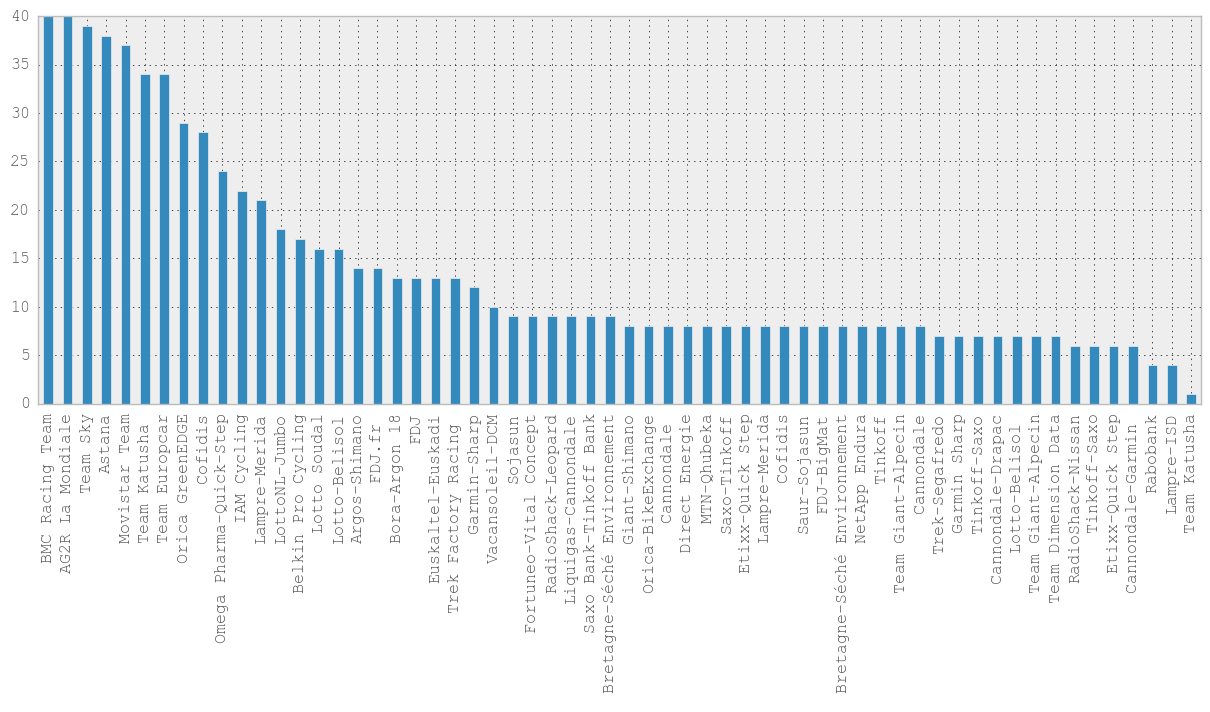

In [19]:
vse['ekipa'].value_counts().plot(kind='bar', fontsize='12')

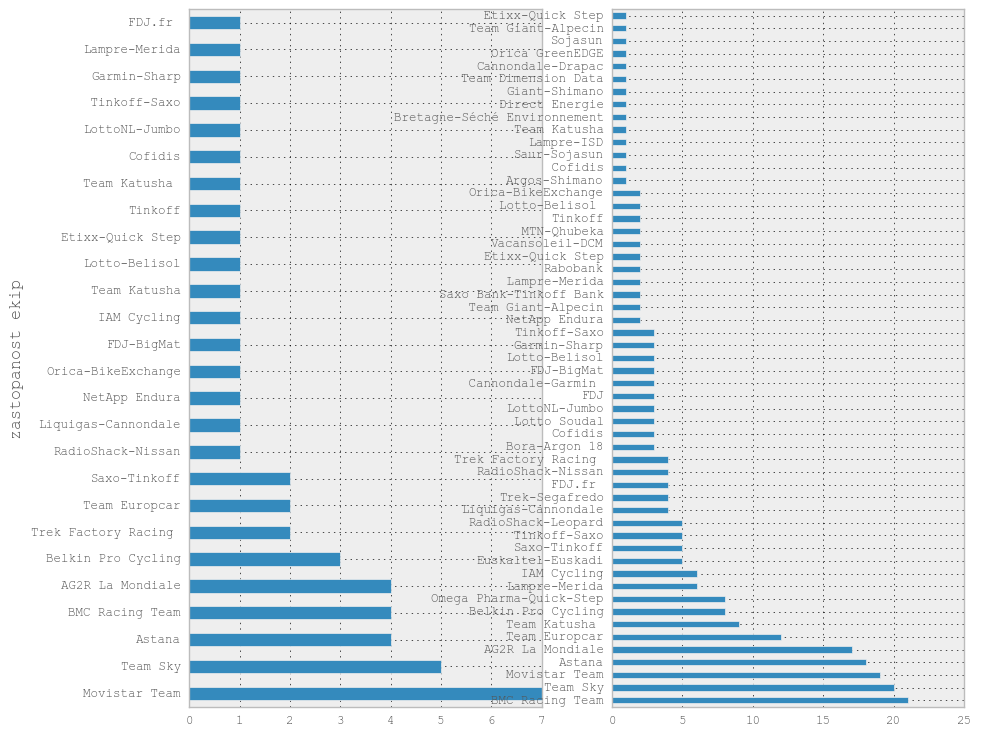

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 9))
for i,var in enumerate([ekipe10['ekipa'].value_counts(), 
                        ekipe50['ekipa'].value_counts()]):
    var.plot(ax=axes[i], kind='barh',fontsize=9)
axes[0].set_ylabel('zastopanost ekip')

In [82]:
def tabela(d1, d2, d3, d4, d5, stolpec):
    df = pd.concat([d1[stolpec].value_counts(), d2[stolpec].value_counts(), 
                    d3[stolpec].value_counts(), d4[stolpec].value_counts(), d5[stolpec].value_counts()], 
                   axis=1)
    df.columns = ['2012', '2013', '2014', '2015', '2016']
    return df
    
def graf(d1, d2, d3, d4, d5, stolpec, naslov):
    df = pd.concat([d1[stolpec].value_counts(), d2[stolpec].value_counts(), 
                    d3[stolpec].value_counts(), d4[stolpec].value_counts(), d5[stolpec].value_counts()], 
                   axis=1)
    df.columns = ['2012', '2013', '2014', '2015', '2016']
    return df.plot(kind='bar', fontsize='12',title=naslov)
    

,2012,2013,2014,2015,2016
Argentina,1.0,NaN,NaN,NaN,2.0
Avstralija,9.0,10.0,7.0,6.0,6.0
Avstrija,1.0,NaN,1.0,3.0,4.0
Belgija,13.0,10.0,8.0,9.0,11.0
Belorusija,2.0,2.0,1.0,NaN,1.0


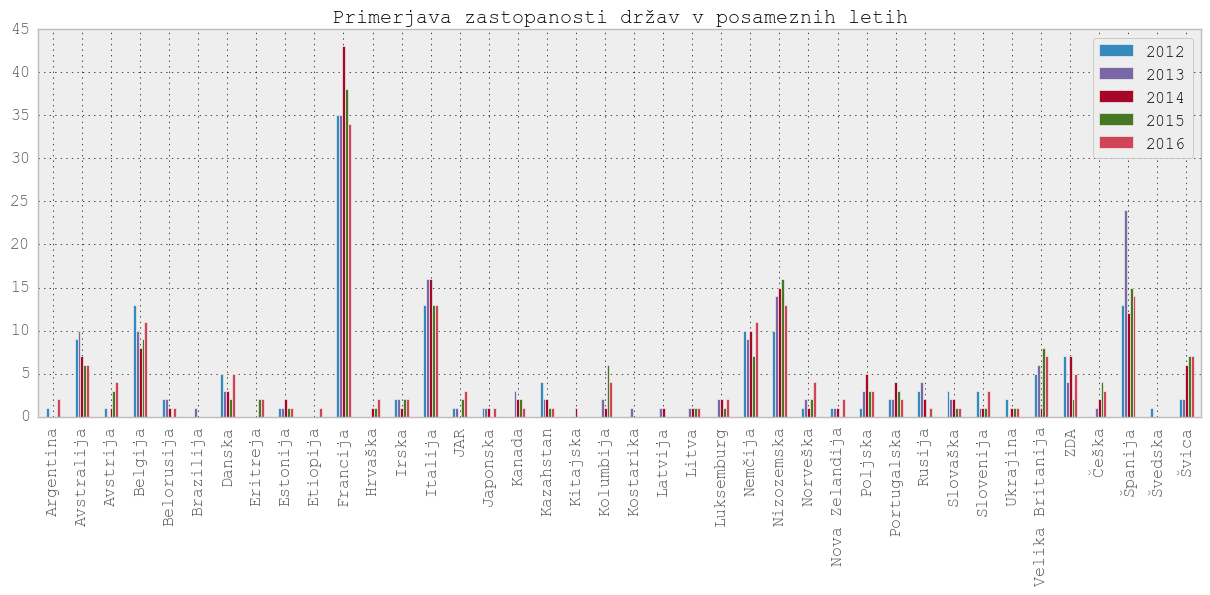

In [24]:
graf(r2012, r2013, r2014, r2015, r2016, 'država', 'Primerjava zastopanosti držav v posameznih letih')
tabela(r2012, r2013, r2014, r2015, r2016, 'država')[:5]

,2012,2013,2014,2015,2016
Bretagne-Séché Environnement,NaN,NaN,NaN,8.0,NaN
Cannondale-Garmin,NaN,NaN,NaN,6.0,NaN
Cofidis,NaN,NaN,NaN,8.0,NaN
Etixx-Quick Step,NaN,NaN,NaN,6.0,NaN
Lampre-Merida,NaN,NaN,NaN,8.0,NaN


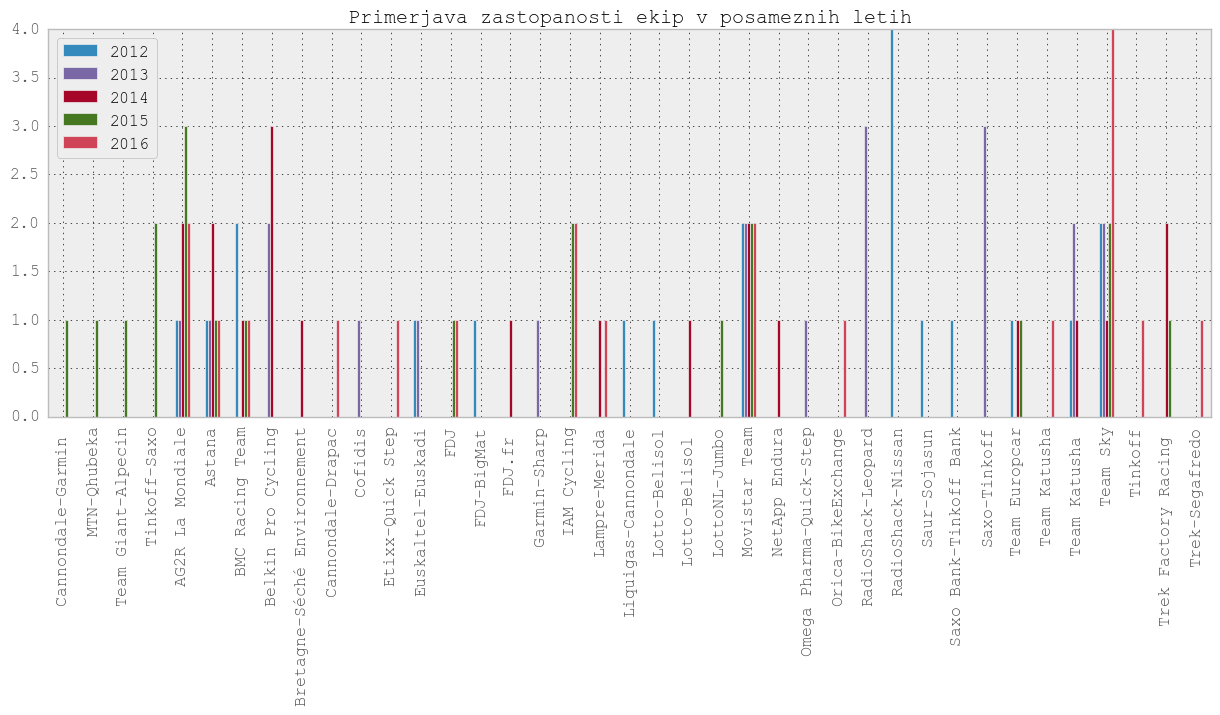

In [25]:
graf(r2012[:20], r2013[:20], r2014[:20], r2015[:20], r2016[:20], 'ekipa',
     'Primerjava zastopanosti ekip v posameznih letih')
tabela(r2012, r2013, r2014, r2015, r2016, 'ekipa')[:5]

### Časovni naskoki zmagovalcev

In [6]:
S = naj50[['leto', 'mesto', 'ime_tekmovalca', 'čas']]
najdva = S[S.mesto <= 2].set_index('leto')
naskok = S[S.mesto == 2][['leto', 'čas']].set_index('leto')

najdva

,mesto,ime_tekmovalca,čas
leto,,,
2012,1,Bradley Wiggins,87:34:47
2012,2,Christopher Froome,3:21
2013,1,Christopher Froome,83:56:40
2013,2,Nairo Quintana,4:20
2014,1,Vincenzo Nibali,89:59:06
2014,2,Jean-Christophe Peraud,7:37
2015,1,Christopher Froome,84:46:14
2015,2,Nairo Quintana,1:12
2016,1,Christopher Froome,89:04:48


In [13]:
max_naskok = naskok.sort_values('čas', ascending=False)
max_naskok.columns = ['zaostanek']
max_naskok

,zaostanek
leto,
2014,7:37
2013,4:20
2016,4:05
2012,3:21
2015,1:12


### Slovenci vs. Francozi 

## 2) Statistika etapnih zmag in profili etap

In [83]:
e2012 = pd.read_csv('Etape\\Tour2012.csv')
e2013 = pd.read_csv('Etape\\Tour2013.csv')
e2014 = pd.read_csv('Etape\\Tour2014.csv')
e2015 = pd.read_csv('Etape\\Tour2015.csv')
e2016 = pd.read_csv('Etape\\Tour2016.csv')

### Profili etap - (povprečne) dolžine in frekvenca vrst 

In [89]:
E = pd.concat([e2012, e2013, e2014, e2015, e2016])
et = E[['leto', 'št_etape', 'vrsta_etape', 'dolžina_etape', 'ime_tekmovalca']]

,2012,2013,2014,2015,2016
gorska,5.0,7.0,6.0,7.0,7.0
gorski kronometer,NaN,NaN,NaN,NaN,1.0
moštveni kronometer,NaN,1.0,NaN,1.0,NaN
ravninska,9.0,8.0,10.0,6.0,7.0
razgibana,4.0,3.0,4.0,6.0,5.0
samostojni kronometer,3.0,2.0,1.0,1.0,1.0


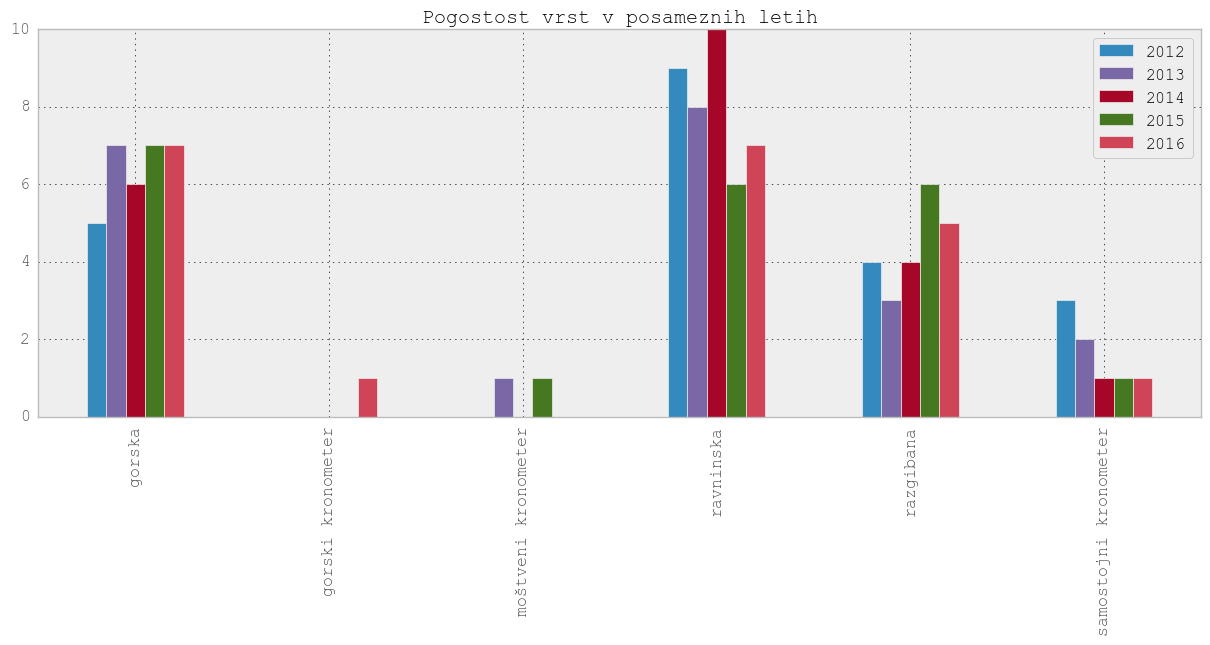

In [84]:
graf(e2012, e2013, e2014, e2015, e2016, 'vrsta_etape', 'Pogostost vrst v posameznih letih')
tabela(e2012, e2013, e2014, e2015, e2016, 'vrsta_etape')

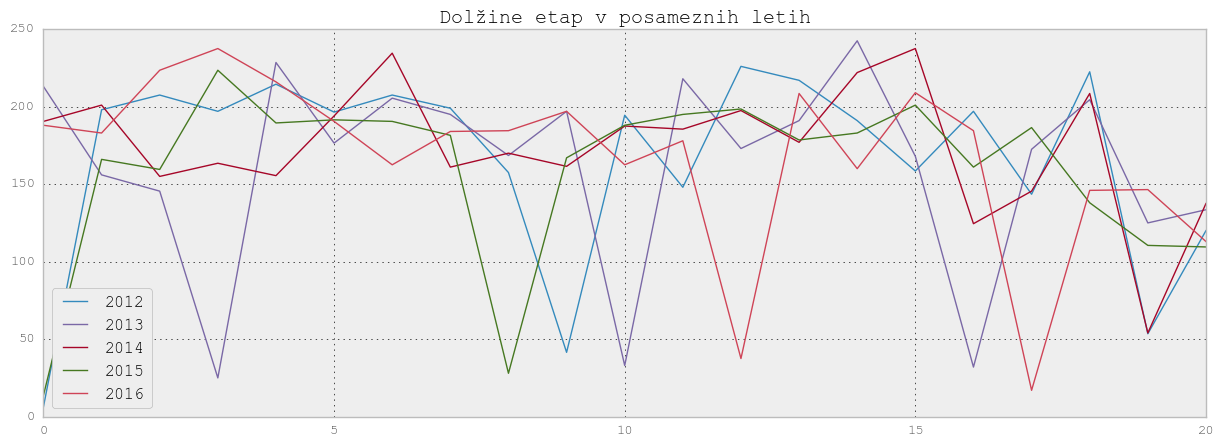

In [106]:
d2 = pd.DataFrame(e2012['dolžina_etape'])
d2.columns = ['2012']
d3 = pd.DataFrame(e2013['dolžina_etape'])
d3.columns = ['2013']
d4 = pd.DataFrame(e2014['dolžina_etape'])
d4.columns = ['2014']
d5 = pd.DataFrame(e2015['dolžina_etape'])
d5.columns = ['2015']
d6 = pd.DataFrame(e2016['dolžina_etape'])
d6.columns = ['2016']
D0 = pd.concat([d2, d3, d4, d5, d6], axis=1)
D0.plot(title='Dolžine etap v posameznih letih')


In [74]:
gore = E[et.vrsta_etape == 'gorska'].groupby('vrsta_etape').mean()['dolžina_etape']
ravnine = E[et.vrsta_etape == 'ravninska'].groupby('vrsta_etape').mean()['dolžina_etape']
razgib = E[et.vrsta_etape == 'razgibana'].groupby('vrsta_etape').mean()['dolžina_etape']
krono = E[et.vrsta_etape == 'samostojni kronometer'].groupby('vrsta_etape').mean()['dolžina_etape']
gorkro = E[et.vrsta_etape == 'gorski kronometer'].groupby('vrsta_etape').mean()['dolžina_etape']
povpr = pd.DataFrame(pd.concat([gore, ravnine, razgib, krono, gorkro]).round(2))
povpr.columns = ['povprečna dolžina etape']
povpr

,povprečna dolžina etape
vrsta_etape,
gorska,172.59
ravninska,188.19
razgibana,184.59
samostojni kronometer,33.96
gorski kronometer,17.00


In [31]:
po = et.groupby('leto', as_index=False).mean()[['leto', 'dolžina_etape']]
po.columns = ['leto', 'povprečje dolžin etap']
po0 = po.sort_values('povprečje dolžin etap', ascending=False).set_index('leto')
po0.round(2)

,povprečje dolžin etap
leto,
2014,174.45
2016,168.05
2012,166.52
2013,162.07
2015,160.01


### Najuspešnejša država/ekipa po št. etapnih zmag 

In [13]:
Edrzave = E[['leto', 'št_etape', 'ime_tekmovalca', 'država']]
Eekipe = E[['leto', 'št_etape', 'ime_tekmovalca', 'ekipa']]

#### a) Tekmovalci 

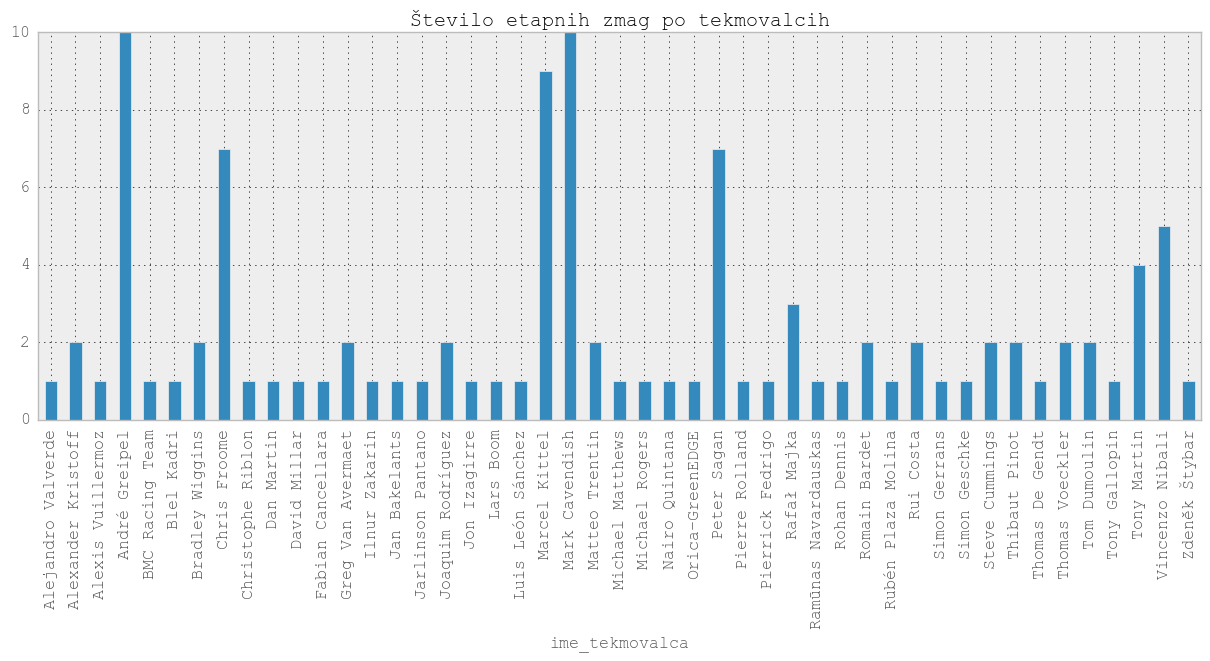

In [90]:
etekm = E.groupby('ime_tekmovalca').size()
etekm.plot(kind='bar', title='Število etapnih zmag po tekmovalcih', fontsize='12')

#### b) Države 

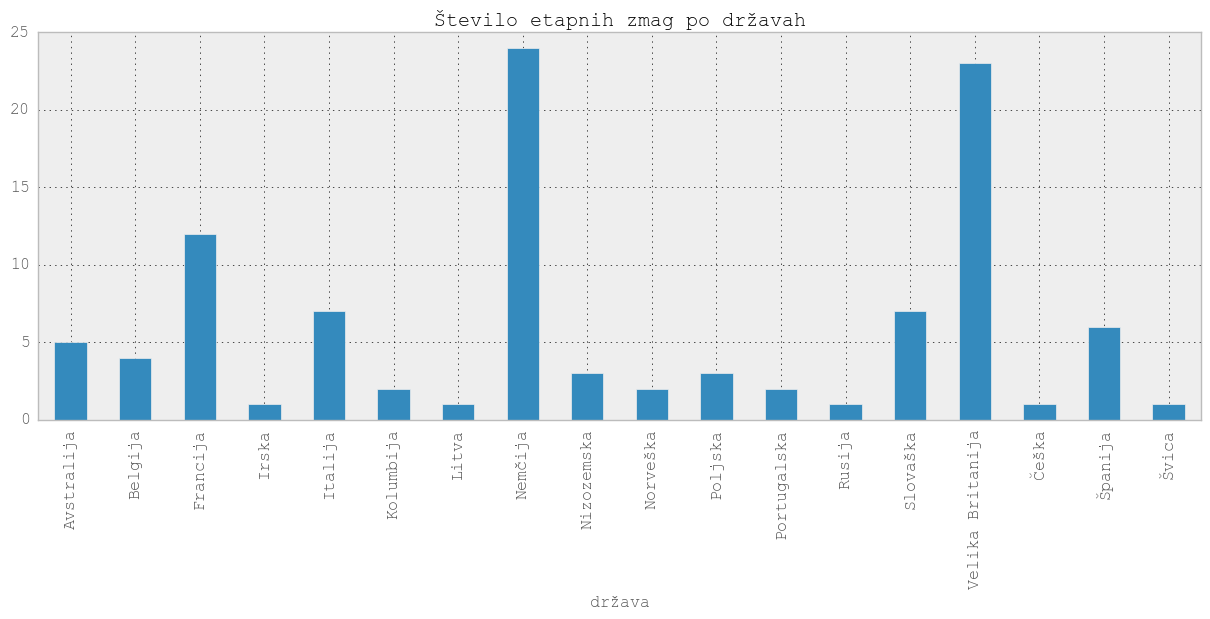

In [92]:
edrzave.groupby('država').size().plot(kind='bar', title='Število etapnih zmag po državah', fontsize='12')

,2012,2013,2014,2015,2016
Avstralija,NaN,2.0,1.0,1.0,1.0
Belgija,NaN,1.0,NaN,1.0,2.0
Francija,5.0,1.0,2.0,3.0,1.0
Irska,NaN,1.0,NaN,NaN,NaN
Italija,NaN,1.0,5.0,1.0,NaN


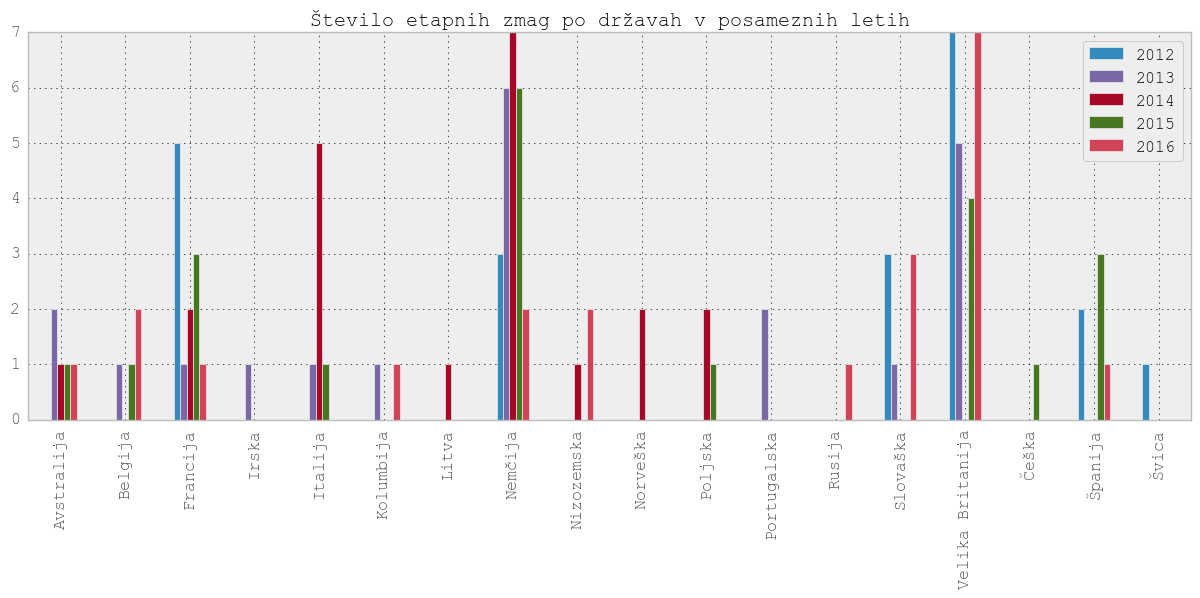

In [93]:
graf(e2012, e2013, e2014, e2015, e2016, 'država', 'Število etapnih zmag po državah v posameznih letih')
tabela(e2012, e2013, e2014, e2015, e2016, 'država')[:5]

#### c) Ekipe 

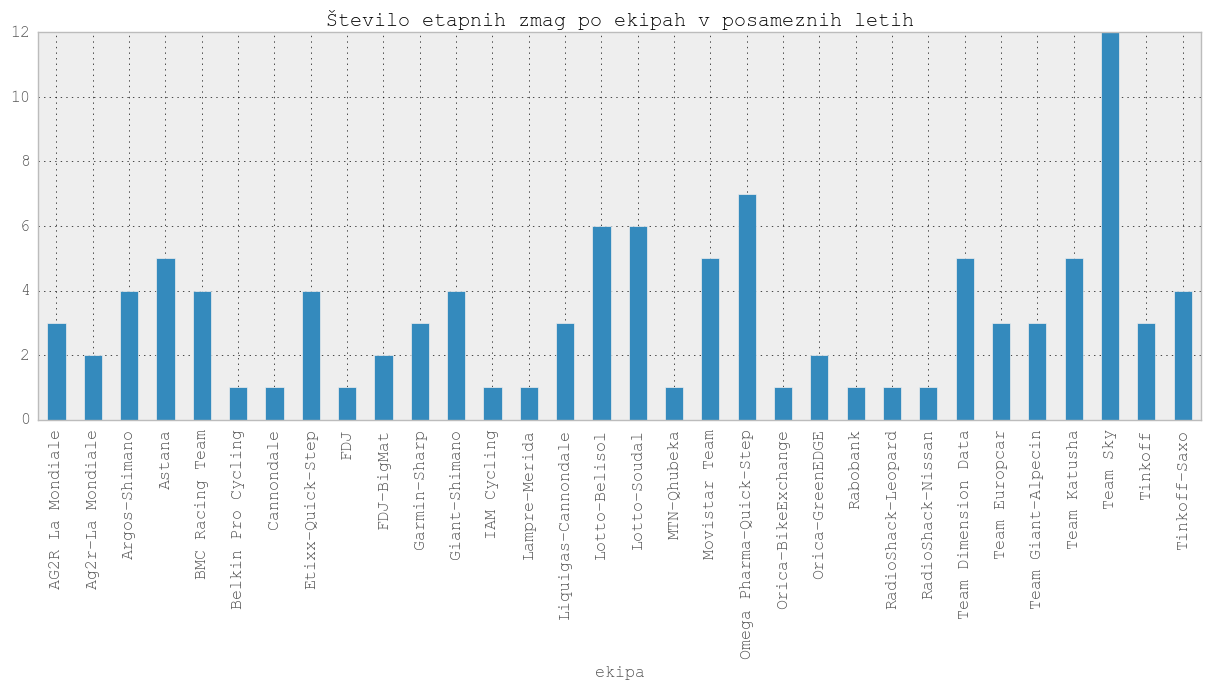

In [95]:
eekipe.groupby('ekipa').size().plot(kind='bar', 
                                    title='Število etapnih zmag po ekipah v posameznih letih', fontsize='12')

,2012,2013,2014,2015,2016
AG2R La Mondiale,NaN,NaN,NaN,2.0,1.0
Ag2r–La Mondiale,NaN,1.0,1.0,NaN,NaN
Argos–Shimano,NaN,4.0,NaN,NaN,NaN
Astana,NaN,NaN,4.0,1.0,NaN
BMC Racing Team,NaN,NaN,NaN,3.0,1.0


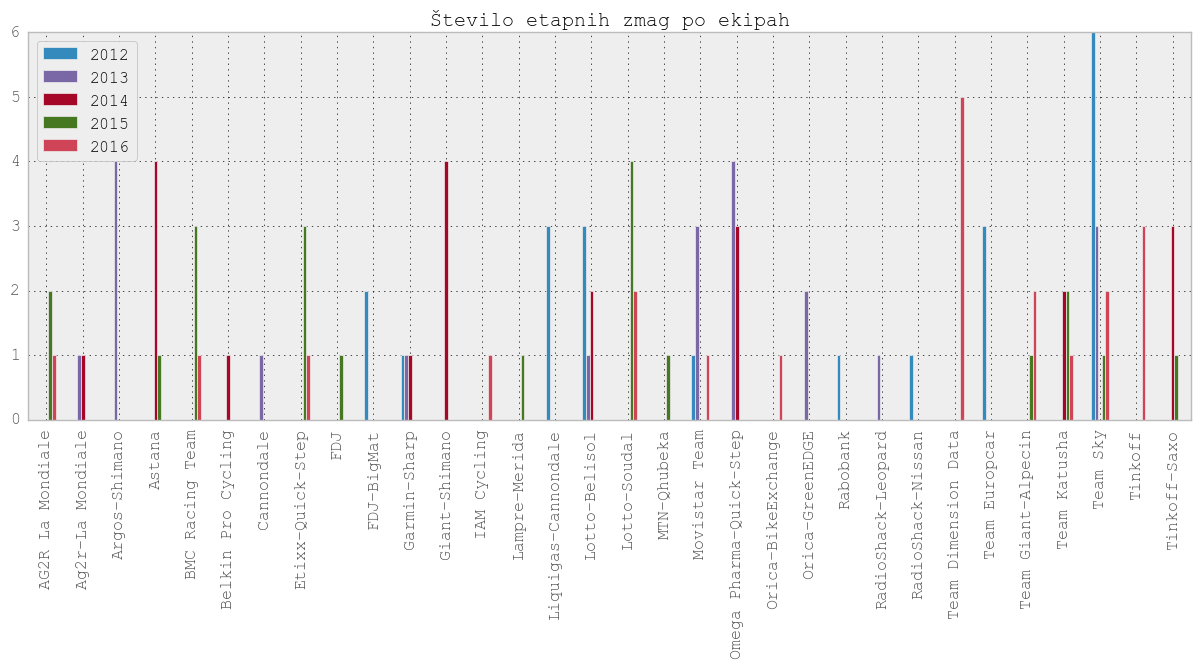

In [87]:
graf(e2012, e2013, e2014, e2015, e2016, 'ekipa', 'Število etapnih zmag po ekipah')
tabela(e2012, e2013, e2014, e2015, e2016, 'ekipa')[:5]

### Uspešnost držav/ekip v različnih vrstah etap

In [109]:
edrzave = E[['leto', 'št_etape', 'vrsta_etape', 'ime_tekmovalca', 'država']]
eekipe = E[['leto', 'št_etape', 'vrsta_etape', 'ime_tekmovalca', 'ekipa']]

#### a) Tekmovalci 

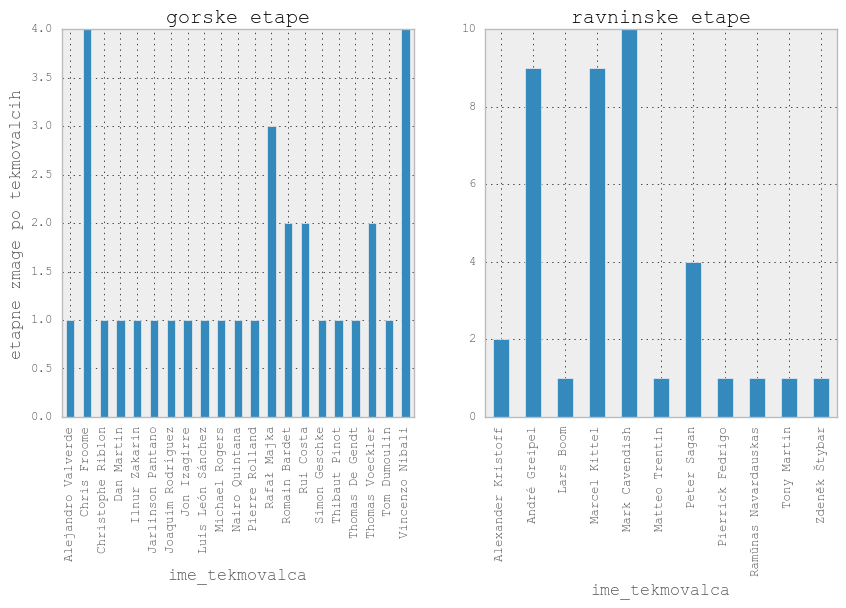

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for i,var in enumerate([(E[et.vrsta_etape == 'gorska'].groupby('ime_tekmovalca').size(), 'gorske etape'), 
                        (E[et.vrsta_etape == 'ravninska'].groupby('ime_tekmovalca').size(), 'ravninske etape')]):
    var[0].plot(ax=axes[i], kind='bar',fontsize=9, title = var[1])
axes[0].set_ylabel('etapne zmage po tekmovalcih')

#### b) Države 

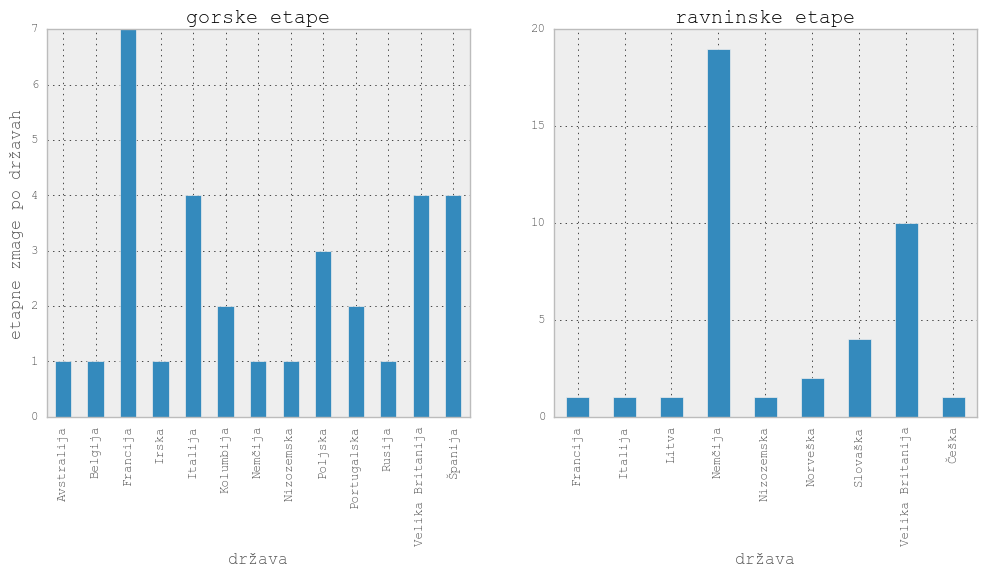

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i,var in enumerate([(E[et.vrsta_etape == 'gorska'].groupby('država').size(), 'gorske etape'), 
                             (E[et.vrsta_etape == 'ravninska'].groupby('država').size(), 'ravninske etape')]):
    var[0].plot(ax=axes[i], kind='bar',fontsize=9, title = var[1])
axes[0].set_ylabel('etapne zmage po državah')

#### c) Ekipe 

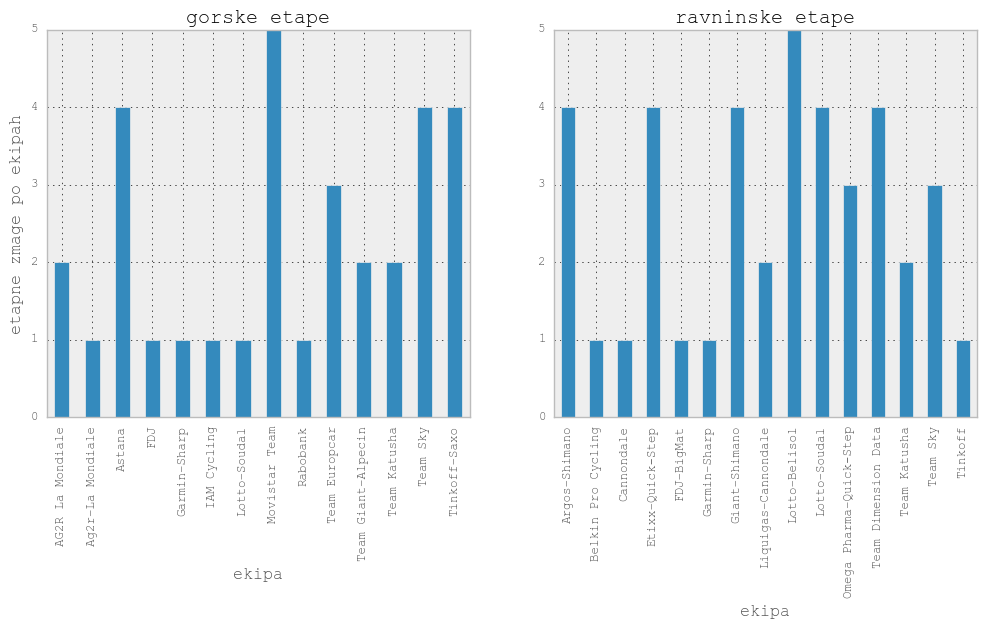

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i,var in enumerate([(E[et.vrsta_etape == 'gorska'].groupby('ekipa').size(), 'gorske etape'), 
                        (E[et.vrsta_etape == 'ravninska'].groupby('ekipa').size(), 'ravninske etape')]):
    var[0].plot(ax=axes[i], kind='bar',fontsize=9, title = var[1])
axes[0].set_ylabel('etapne zmage po ekipah')

## 3) Zelena, bela, pikčasta majica, ekipna uvrstitev-najboljših 10

*Končni nosilec zelene majice je zmagovalec po številu zbranih točk na vmesnih sprintih in (odvisno od etape) ciljih etap. Število doseženih točk variira glede na vrsto etape.*

*Seštevek za belo majico je podoben tistemu za rumeno, le da so uvrščeni le kolesarji, mlajši od 25 let.*

*Pikčasto majico osvoji kolesar, ki zbere največ točk na vmesnih gorskih ciljih. Število podeljenih točk je odvisno od kategorije vzpona.*

### Analiza glede na posamezno kategorijo

### a) Zelena majica (točke) 

In [107]:
def vstavi(sez, vrsta):
    for dat in sez:
        dat.insert(2, 'vrsta_majice', vrsta)

In [108]:
z2012 = pd.read_csv('Zelena\\Tour2012_2.csv')
z2013 = pd.read_csv('Zelena\\Tour2013_2.csv')
z2014 = pd.read_csv('Zelena\\Tour2014_2.csv')
z2015 = pd.read_csv('Zelena\\Tour2015_2.csv')
z2016 = pd.read_csv('Zelena\\Tour2016_2.csv')
vstavi([z2012, z2013, z2014, z2015, z2016], 'Zelena')
Z = pd.concat([z2012, z2013, z2014, z2015, z2016])

,2012,2013,2014,2015,2016
Argentina,1.0,NaN,NaN,NaN,NaN
Avstralija,2.0,NaN,1.0,NaN,1.0
Belgija,NaN,NaN,1.0,1.0,2.0
Francija,NaN,1.0,2.0,2.0,1.0
Italija,NaN,NaN,1.0,NaN,NaN


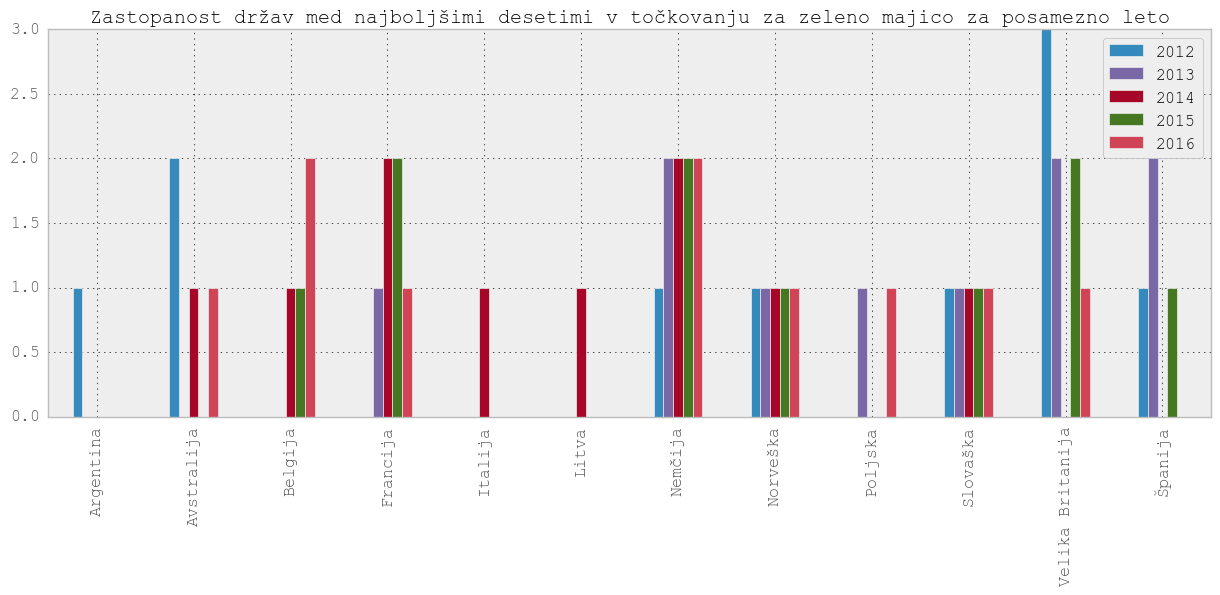

In [71]:
graf(z2012, z2013, z2014, z2015, z2016, 'država', 
     'Zastopanost držav med najboljšimi desetimi v točkovanju za zeleno majico za posamezno leto')
tabela(z2012, z2013, z2014, z2015, z2016, 'država')[:5]

,2012,2013,2014,2015,2016
Ag2r–La Mondiale,NaN,1.0,1.0,NaN,NaN
Argos–Shimano,NaN,1.0,NaN,NaN,NaN
Astana,NaN,NaN,1.0,NaN,NaN
BMC Racing Team,1.0,NaN,1.0,NaN,1.0
Cannondale,NaN,1.0,1.0,NaN,NaN


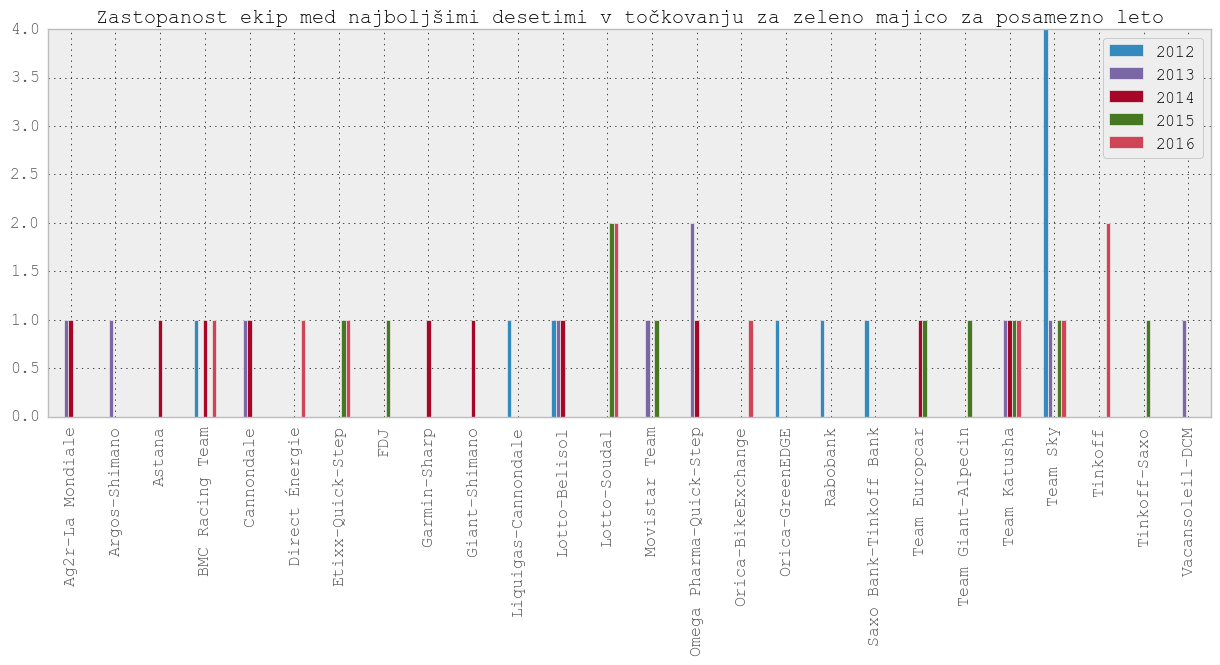

In [111]:
graf(z2012, z2013, z2014, z2015, z2016, 'ekipa', 
     'Zastopanost ekip med najboljšimi desetimi v točkovanju za zeleno majico za posamezno leto')
tabela(z2012, z2013, z2014, z2015, z2016, 'ekipa')[:5]

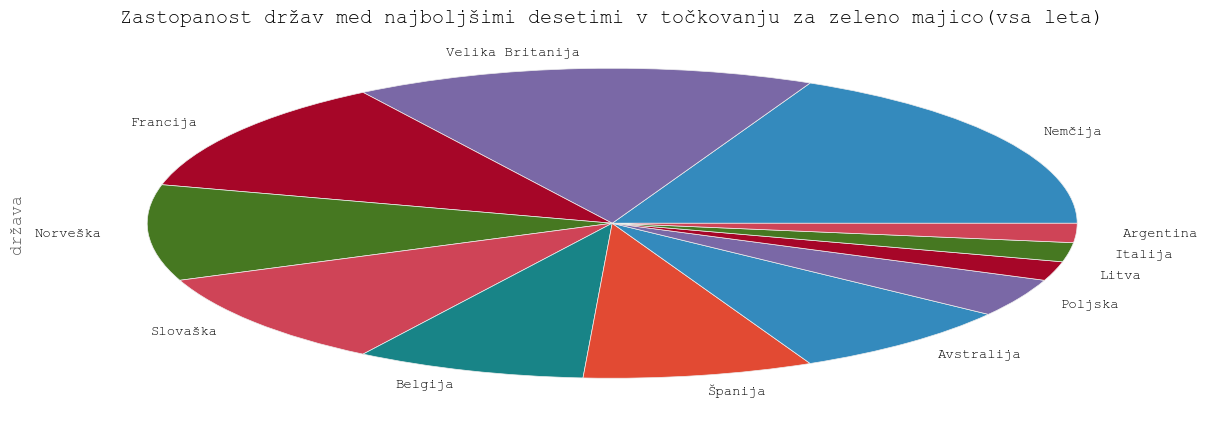

In [112]:
Z['država'].value_counts().plot(kind='pie', 
                                title='Zastopanost držav med najboljšimi desetimi v točkovanju za zeleno majico(vsa leta)')

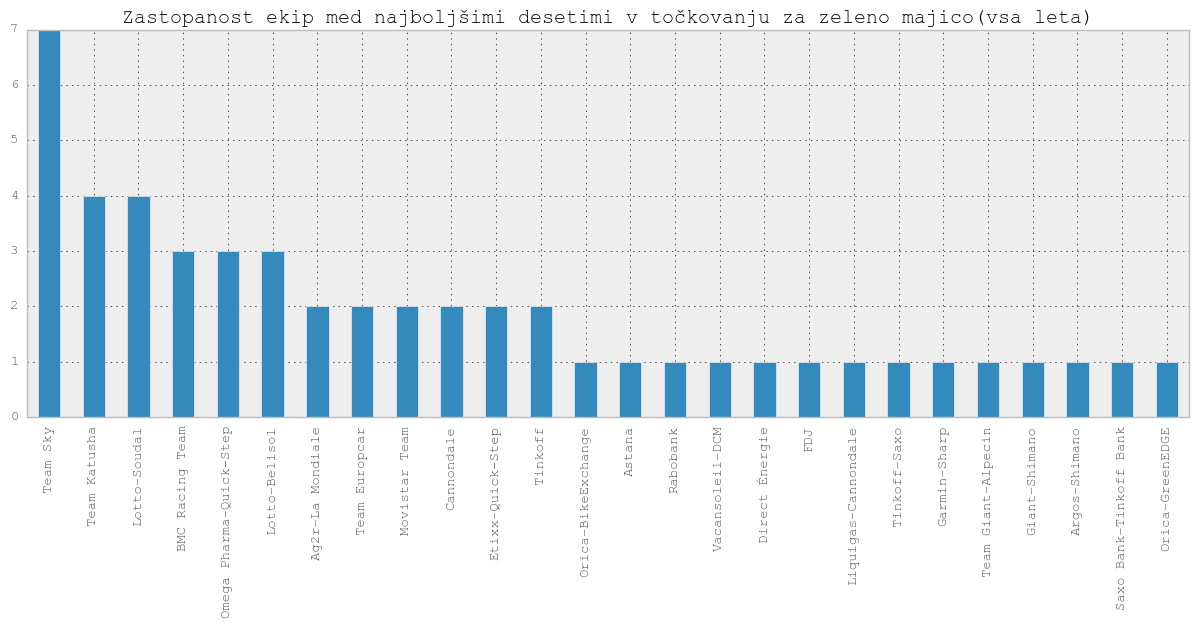

In [113]:
Z['ekipa'].value_counts().plot(kind='bar',
                               title='Zastopanost ekip med najboljšimi desetimi v točkovanju za zeleno majico(vsa leta)')

### b) Pikčasta majica (vmesni gorski cilji) 

In [115]:
p2012 = pd.read_csv('Pikčasta\\Tour2012_3.csv')
p2013 = pd.read_csv('Pikčasta\\Tour2013_3.csv')
p2014 = pd.read_csv('Pikčasta\\Tour2014_3.csv')
p2015 = pd.read_csv('Pikčasta\\Tour2015_3.csv')
p2016 = pd.read_csv('Pikčasta\\Tour2016_3.csv')
vstavi([p2012, p2013, p2014, p2015, p2016], 'Pikčasta')
P = pd.concat([p2012, p2013, p2014, p2015, p2016])

,2012,2013,2014,2015,2016
Avstralija,NaN,1.0,NaN,1.0,NaN
Belgija,NaN,NaN,NaN,1.0,2.0
Danska,1.0,NaN,NaN,1.0,NaN
Francija,4.0,2.0,3.0,3.0,1.0
Hrvaška,NaN,NaN,NaN,NaN,1.0


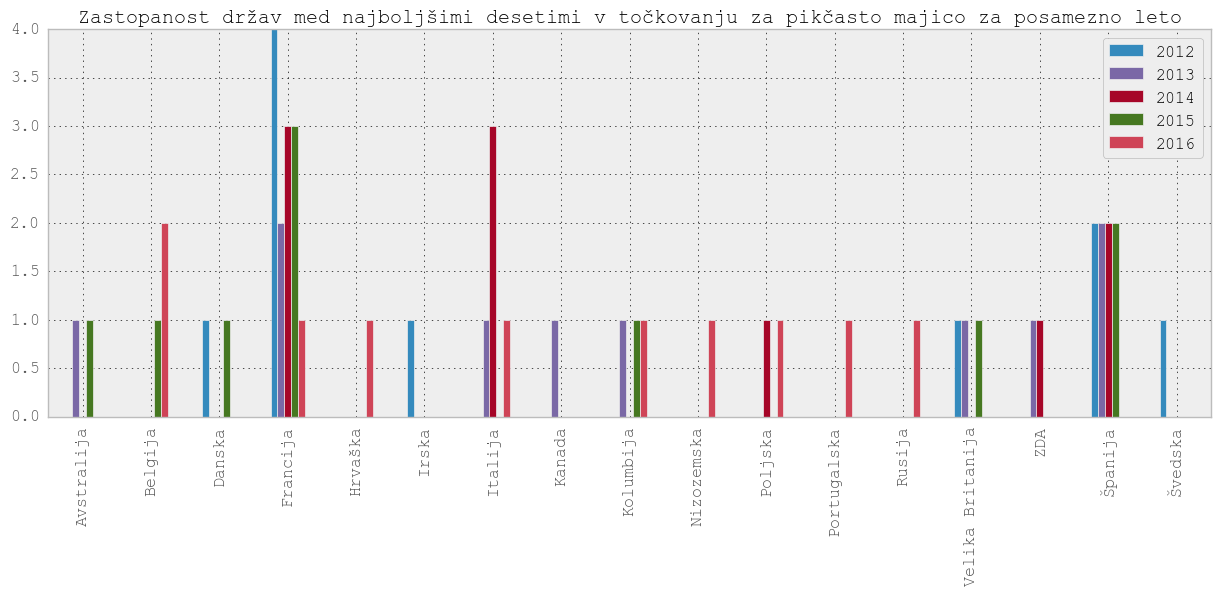

In [116]:
graf(p2012, p2013, p2014, p2015, p2016, 'država',
     'Zastopanost držav med najboljšimi desetimi v točkovanju za pikčasto majico za posamezno leto')
tabela(p2012, p2013, p2014, p2015, p2016, 'država')[:5]

,2012,2013,2014,2015,2016
AG2R La Mondiale,NaN,NaN,NaN,1.0,NaN
Ag2r–La Mondiale,NaN,1.0,1.0,NaN,NaN
Astana,1.0,NaN,1.0,1.0,1.0
BMC Racing Team,NaN,1.0,1.0,NaN,NaN
Cannondale,NaN,1.0,1.0,NaN,NaN


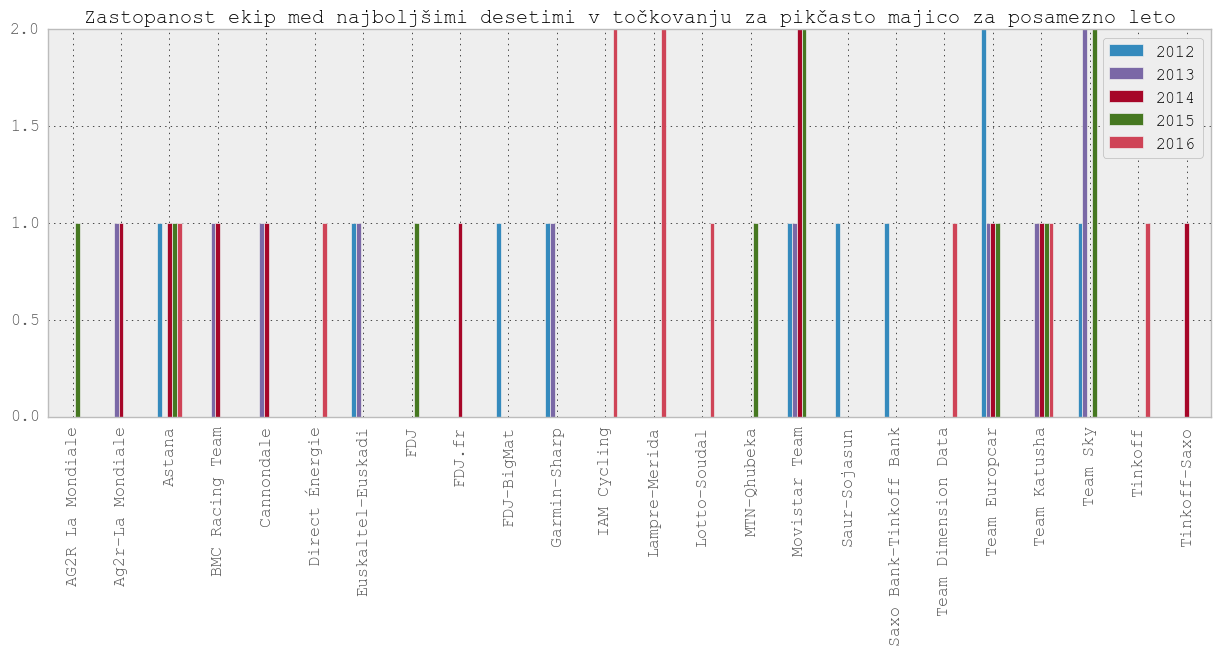

In [124]:
graf(p2012, p2013, p2014, p2015, p2016, 'ekipa',
     'Zastopanost ekip med najboljšimi desetimi v točkovanju za pikčasto majico za posamezno leto')
tabela(p2012, p2013, p2014, p2015, p2016, 'ekipa')[:5]

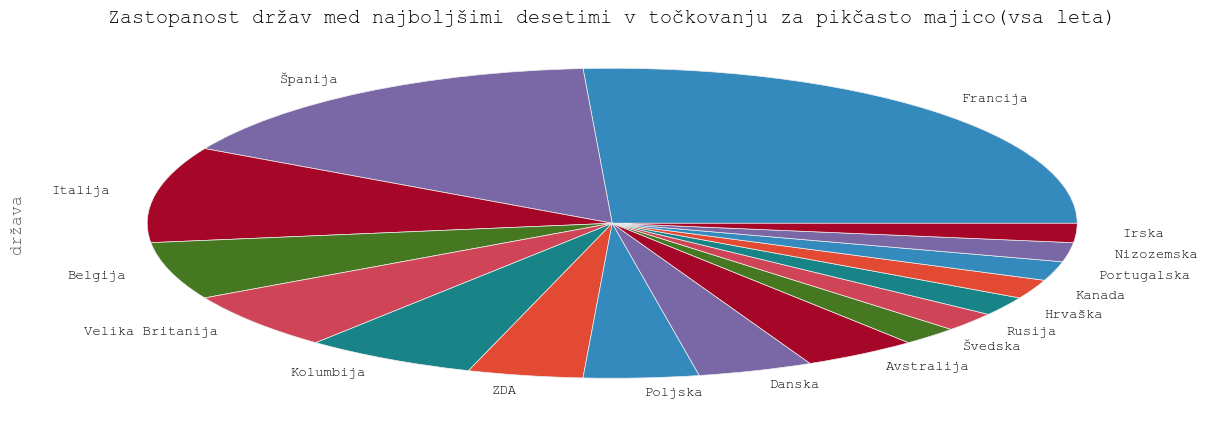

In [119]:
P['država'].value_counts().plot(kind='pie', 
                                title='Zastopanost držav med najboljšimi desetimi v točkovanju za pikčasto majico(vsa leta)')

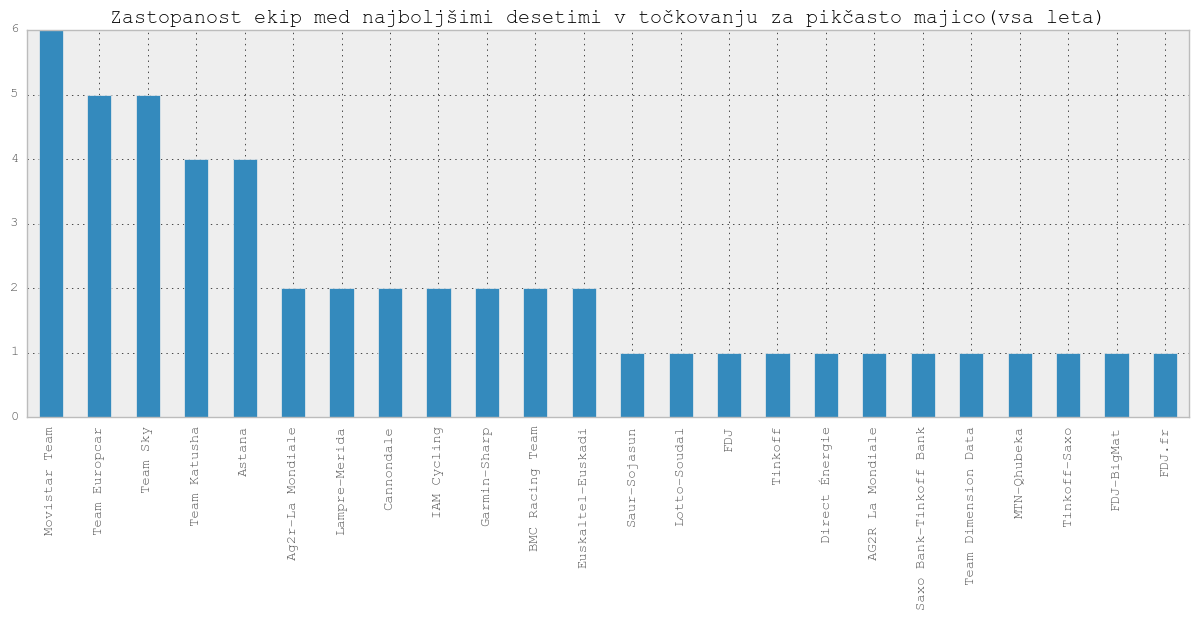

In [120]:
P['ekipa'].value_counts().plot(kind='bar', 
                               title='Zastopanost ekip med najboljšimi desetimi v točkovanju za pikčasto majico(vsa leta)')

### c) Bela majica (pod 25 let) 

In [121]:
b2012 = pd.read_csv('Bela\\Tour2012_4.csv')
b2013 = pd.read_csv('Bela\\Tour2013_4.csv')
b2014 = pd.read_csv('Bela\\Tour2014_4.csv')
b2015 = pd.read_csv('Bela\\Tour2015_4.csv')
b2016 = pd.read_csv('Bela\\Tour2016_4.csv')
vstavi([b2012, b2013, b2014, b2015, b2016], 'Bela')
B = pd.concat([b2012, b2013, b2014, b2015, b2016])

,2012,2013,2014,2015,2016
Argentina,NaN,NaN,NaN,NaN,1.0
Avstrija,NaN,NaN,NaN,NaN,1.0
Eritreja,NaN,NaN,NaN,1.0,NaN
Estonija,1.0,NaN,NaN,NaN,NaN
Francija,1.0,5.0,3.0,3.0,2.0


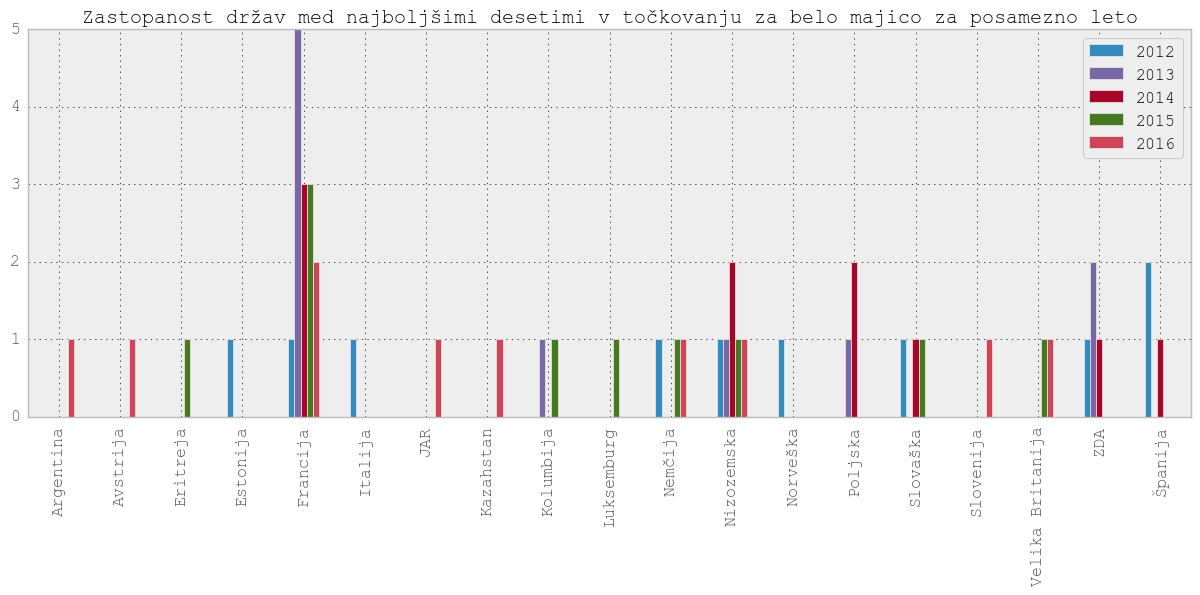

In [122]:
graf(b2012, b2013, b2014, b2015, b2016, 'država', 'Zastopanost držav med najboljšimi desetimi v točkovanju za belo majico za posamezno leto')
tabela(b2012, b2013, b2014, b2015, b2016, 'država')[:5]

,2012,2013,2014,2015,2016
AG2R La Mondiale,NaN,NaN,NaN,1.0,NaN
Ag2r–La Mondiale,NaN,1.0,1.0,NaN,NaN
Argos–Shimano,NaN,1.0,NaN,NaN,NaN
Astana,NaN,NaN,NaN,NaN,1.0
BMC Racing Team,1.0,1.0,NaN,NaN,NaN


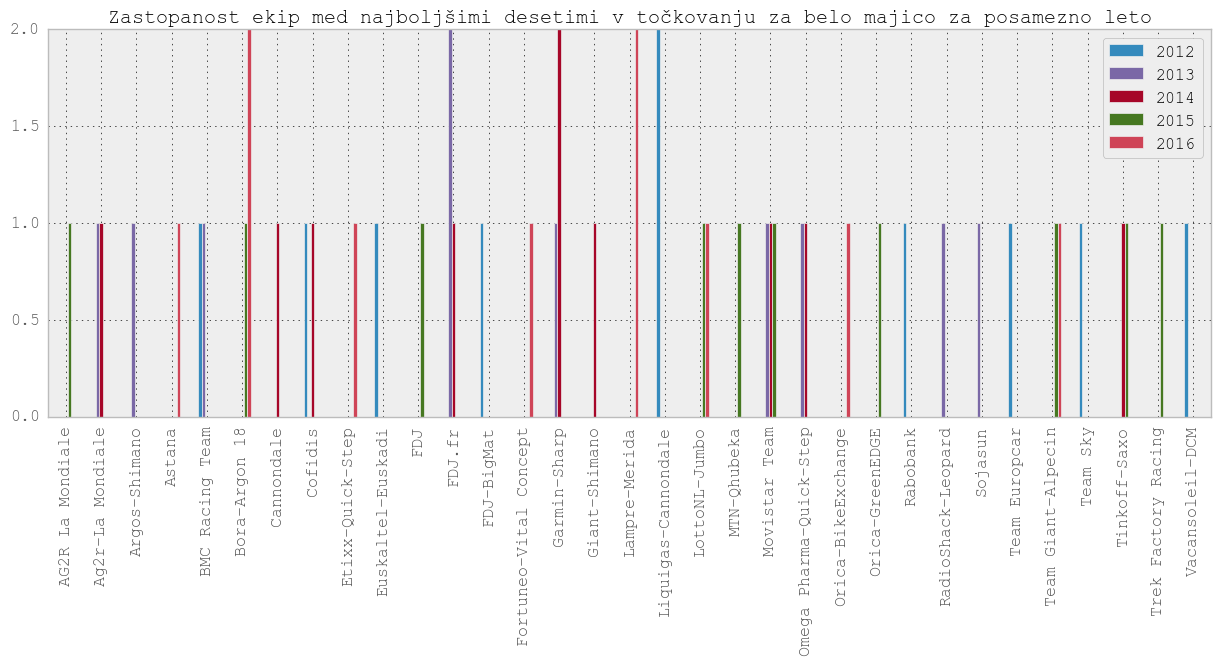

In [123]:
graf(b2012, b2013, b2014, b2015, b2016, 'ekipa', 
     'Zastopanost ekip med najboljšimi desetimi v točkovanju za belo majico za posamezno leto')
tabela(b2012, b2013, b2014, b2015, b2016, 'ekipa')[:5]

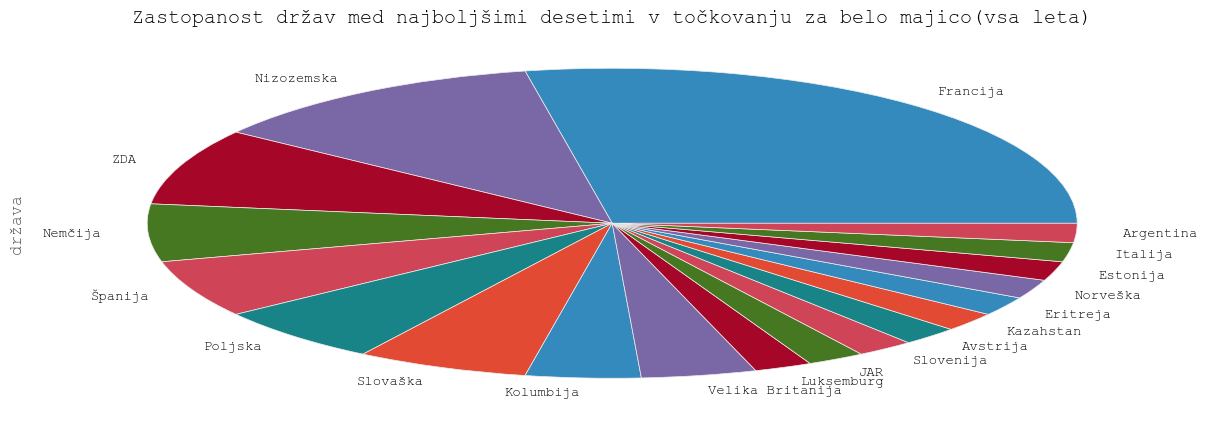

In [125]:
B['država'].value_counts().plot(kind='pie', 
                               title='Zastopanost držav med najboljšimi desetimi v točkovanju za belo majico(vsa leta)')

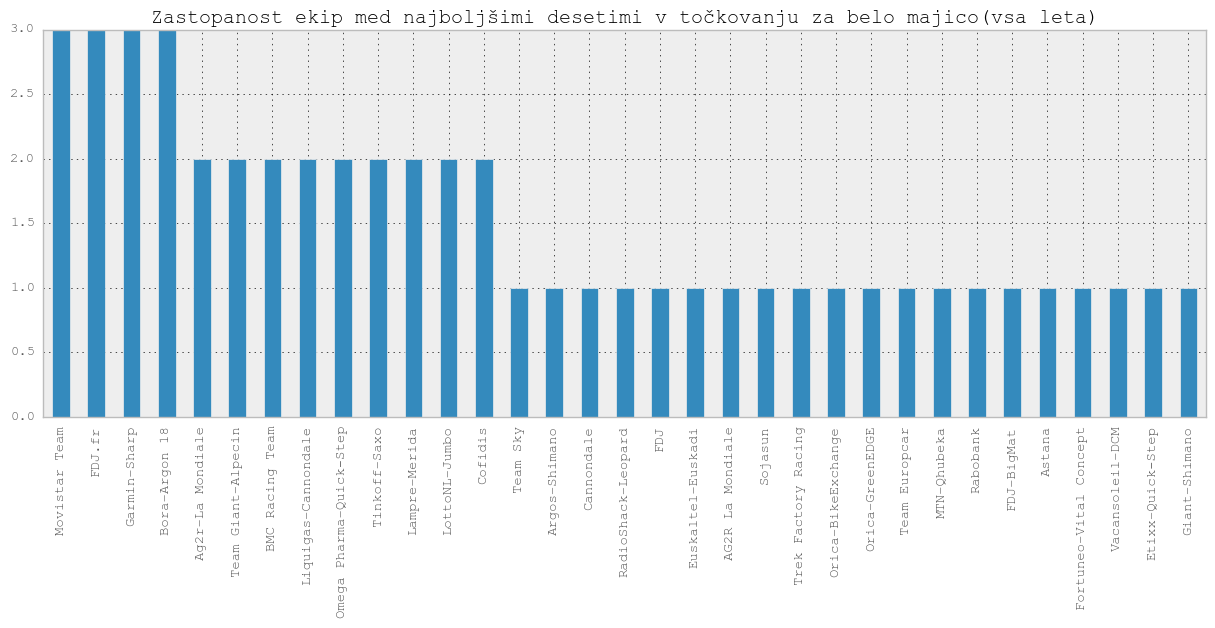

In [126]:
B['ekipa'].value_counts().plot(kind='bar', 
                               title='Zastopanost ekip med najboljšimi desetimi v točkovanju za belo majico(vsa leta)')

### Splošna analiza - največ osvojenih majic skozi leta 

In [154]:
def zmage_r(sez):
    for par in sez:
        print(par[0][par[0]['ime_tekmovalca'] == par[1]]['ime_tekmovalca'].value_counts())
zmage_r([(e2012,'Bradley Wiggins'), (e2013,'Chris Froome'), 
         (e2014,'Vincenzo Nibali'), (e2015,'Chris Froome'), (e2016,'Chris Froome')])

Bradley Wiggins    2
Name: ime_tekmovalca, dtype: int64
Chris Froome    3
Name: ime_tekmovalca, dtype: int64
Vincenzo Nibali    4
Name: ime_tekmovalca, dtype: int64
Chris Froome    1
Name: ime_tekmovalca, dtype: int64
Chris Froome    2
Name: ime_tekmovalca, dtype: int64


In [49]:
najdrzave.insert(3, 'vrsta_majice', 'Rumena')

In [50]:
najekipe.insert(3, 'vrsta_majice', 'Rumena')

In [51]:
majice = pd.concat([Z[Z.mesto == 1], P[P.mesto == 1], 
                    B[B.mesto == 1]])[['leto', 'ime_tekmovalca', 'država', 'ekipa', 'vrsta_majice']]
majiced = pd.concat([majice[['leto', 'ime_tekmovalca', 'država', 'vrsta_majice']], 
                     najdrzave[['ime_tekmovalca', 'država', 'vrsta_majice']]])
majicee = pd.concat([majice[['leto', 'ime_tekmovalca', 'ekipa', 'vrsta_majice']], 
                     najekipe[['ime_tekmovalca', 'ekipa', 'vrsta_majice']]])

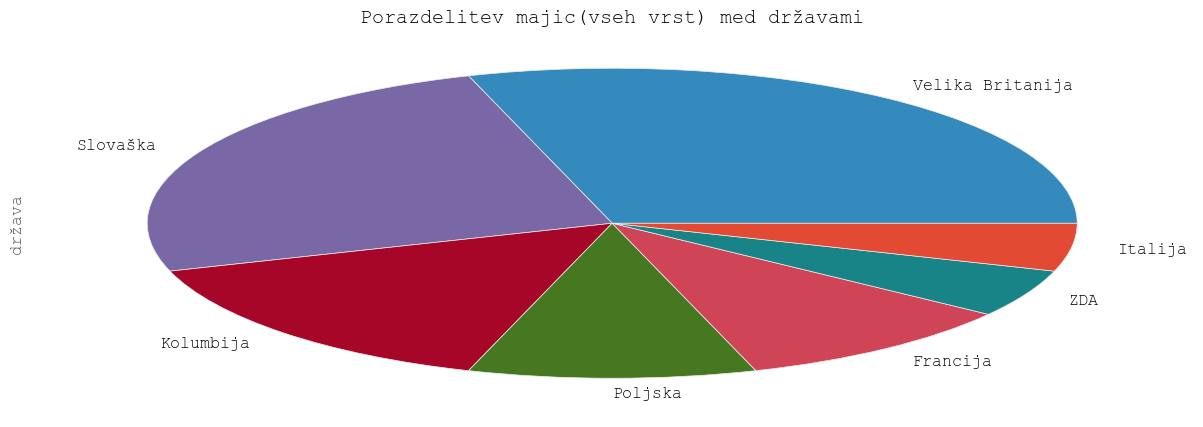

In [52]:
majiced['država'].value_counts().plot(kind='pie', fontsize='12',
                                      title='Porazdelitev majic(vseh vrst) med državami')

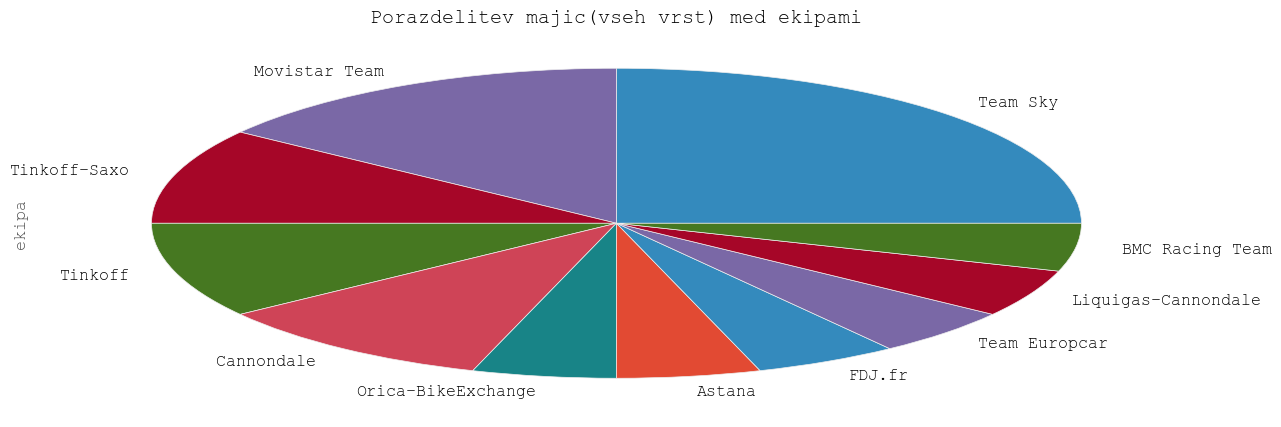

In [53]:
majicee['ekipa'].value_counts().plot(kind='pie', fontsize='12',
                                    title='Porazdelitev majic(vseh vrst) med ekipami')

### Rumena vs. Bela 

In [50]:
naskokb = B[B.mesto == 2][['leto', 'čas']].set_index('leto')
naskokb.columns = ['zaostanek bela']
naskok0 = pd.DataFrame(naskok['čas'])
naskok0.columns = ['zaostanek rumena']
naskok0.join(naskokb)

,zaostanek rumena,zaostanek bela
leto,,
2012,3:21,6:13
2013,4:20,13:19
2014,7:37,3:11
2015,1:12,14:48
2016,4:05,2:16
